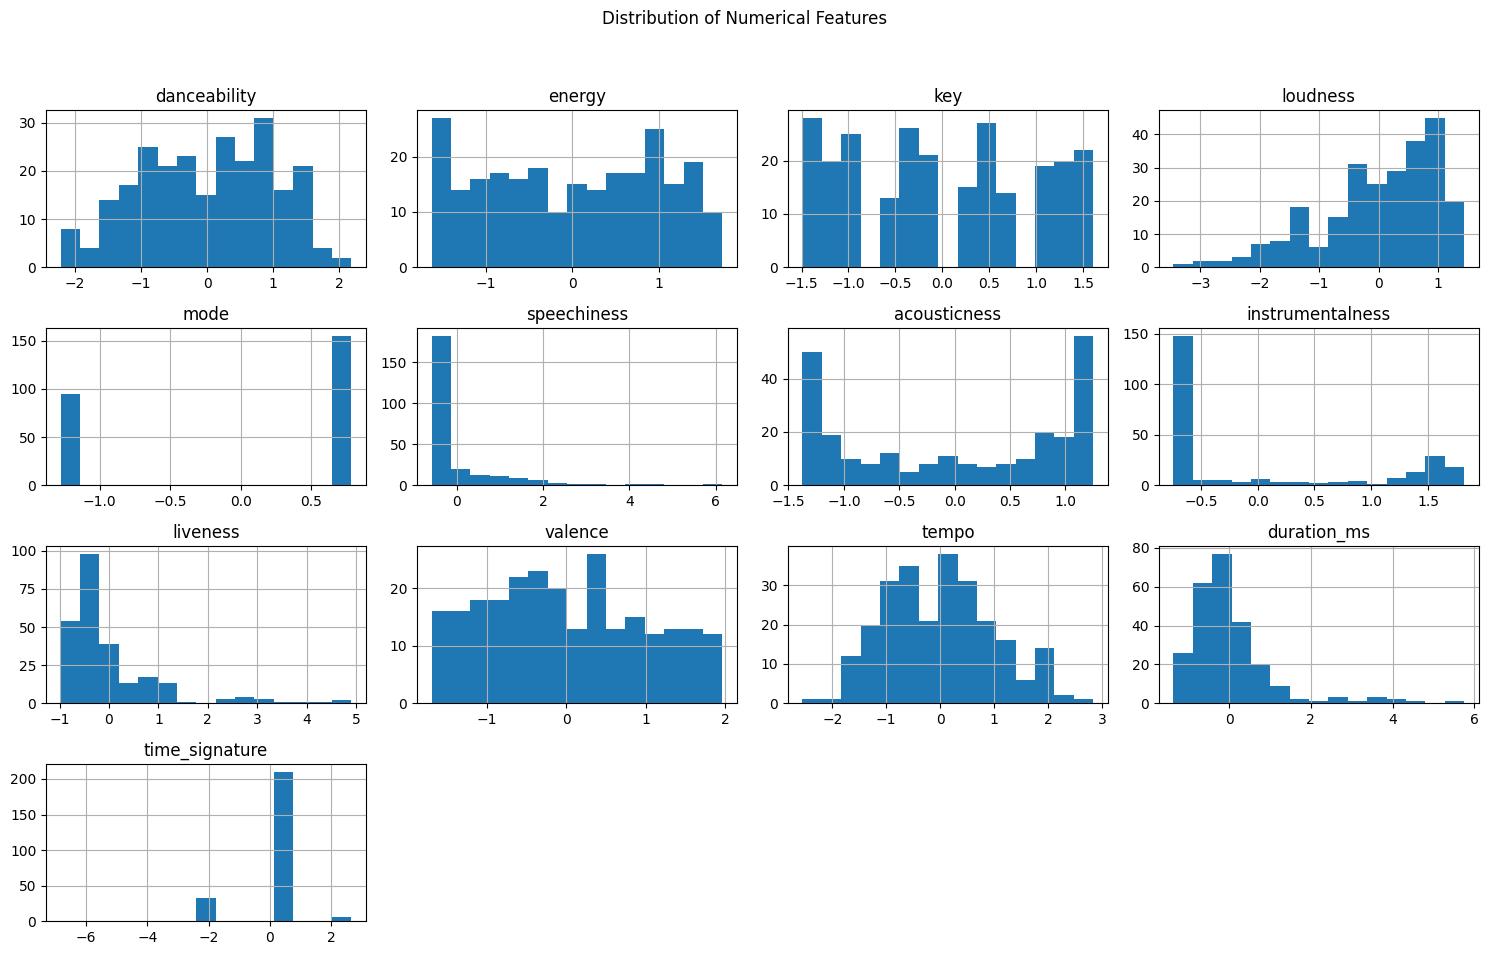

# Analysis:
- Danceability:

The distribution of danceability appears to be approximately normal, centered around the mean value. There is a slight skew towards the higher values, indicating that most tracks have a moderately high danceability.

- Energy:

The energy feature has a relatively uniform distribution with a slight peak towards the higher end, indicating that many tracks possess high energy levels.

- Key:

The key feature is categorical and has a relatively uniform distribution across different keys, with some keys being more common than 
others.

- Loudness:

Loudness distribution is skewed towards higher values, indicating that most tracks are produced at relatively high loudness levels. This is typical for modern music production.

- Mode:

The mode feature is binary and shows a clear division, with a higher concentration around mode 1. This indicates a prevalence of major modes over minor modes in the dataset.

- Speechiness:

The speechiness feature has a strong left skew, with most tracks having low speechiness values. This suggests that the majority of the tracks are more spoken word and rap rather than only musical.

- Acousticness:

Acousticness shows a bimodal distribution, with peaks at both high and low values. This suggests a mix of highly acoustic tracks and highly electronic tracks in the dataset.

- Instrumentalness:

Instrumentalness is heavily skewed towards zero, indicating that most tracks have vocals and are not purely instrumental.

- Liveness:

Liveness has a left-skewed distribution, indicating that most tracks were recorded in live settings rather than studio environments.

- Valence:

Valence shows a uniform distribution, indicating a wide range of emotions expressed across the tracks, from sad to happy.

- Tempo:

The tempo distribution appears bimodal, with peaks indicating common tempos for different genres. This suggests distinct groups of tracks with specific tempo ranges.

- Duration (ms):

The duration of tracks shows a strong left skew, with most tracks having a typical duration of a few minutes, common for popular music tracks.

- Time Signature:

The time signature distribution shows that the majority of tracks follow the common 4/4 time signature, with very few tracks deviating from this standard.


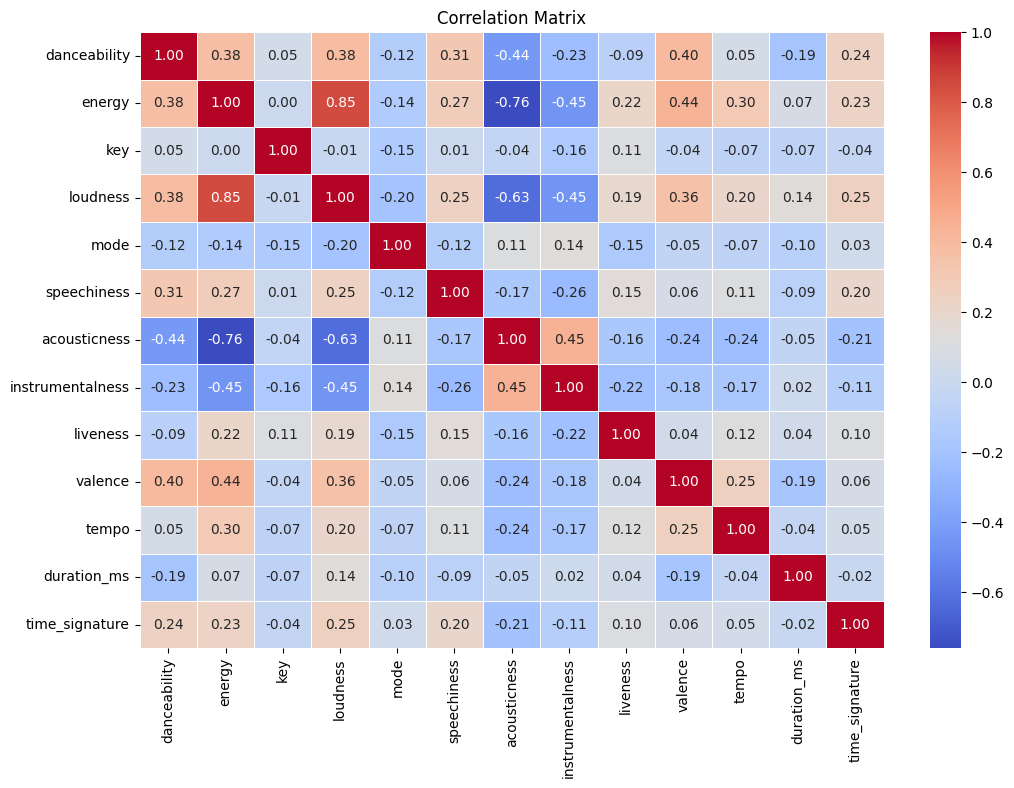

## Key Observations:
#### Strong Positive Correlations:

- energy and loudness (0.85): These features have a strong positive correlation, indicating that tracks with higher energy tend to be louder.
- danceability and valence (0.40): Higher danceability is associated with higher valence, suggesting that more danceable tracks are generally more positive or happy.
- valence and energy (0.44): More positive (valence) tracks tend to be more energetic.

#### Strong Negative Correlations:

- acousticness and energy (-0.76): Tracks that are more acoustic tend to have lower energy.
- acousticness and loudness (-0.63): More acoustic tracks tend to be quieter.
- acousticness and danceability (-0.44): Higher acousticness is associated with lower danceability.

#### Moderate Correlations:

- danceability and loudness (0.38): Danceable tracks tend to be louder.
- instrumentalness and loudness (-0.45): Instrumental tracks tend to be quieter.
- danceability and energy (0.38): Danceable tracks tend to be energetic.

### Interpretation:
Positive Correlations: Features that tend to increase together. For example, as the energy of a track increases, its loudness also tends to increase.
Negative Correlations: Features that tend to move in opposite directions. For example, as the acousticness of a track increases, its energy tends to decrease.

### Model Training and Evaluation

The process begins with loading the cleaned Spotify dataset and preprocessing it by dropping non-numeric columns that are not useful for the model. The features (X) and target (y) variables are defined, with the target being one-hot encoded labels converted to single labels. The dataset is then split into training and testing sets.

The models evaluated include Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM), Gradient Boosting Classifier, and a Voting Classifier that combines the predictions of the Random Forest, SVM, and Gradient Boosting models.

1. **Logistic Regression**:
   - Achieved an accuracy of 0.72. 
   - Showed decent performance specially for genres like `genre_hip-hop``genre_jazz` but struggled with other genres like `genre_rock`.

2. **Tuned Random Forest Classifier**:
   - Hyperparameter tuning using GridSearchCV identified the best parameters as `{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}`.
   - Achieved an accuracy of 0.60, performing well across multiple genres, especially `genre_hip-hop`and `genre_jazz`(F1-Score 0.76).

3. **Tuned SVM Classifier**:
   - Hyperparameter tuning identified the best parameters as `{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}`.
   - Achieved an accuracy of 0.72 like the Logistic Regression, with improved performance for `genre_jazz` (F1-Score 0.89) but still struggling with `genre_rock`.

4. **Gradient Boosting Classifier**:
   - Achieved an accuracy of 0.68, performing well for `genre_hip-hop` (F1-Score 0.85) and `genre_jazz` (F1-Score 0.82), but poorly for `genre_pop`.

5. **Voting Classifier**:
   - Combined the predictions of Random Forest, SVM, and Gradient Boosting models using a soft voting approach.
   - Achieved an accuracy of 0.68, showing improved performance for several genres, notably `genre_hip-hop` (F1-Score 0.80), while still facing challenges with `genre_rock`.

Overall, the logistic regression and the Tuned SVM Classifier emerged as the best's individual models, and the Voting Classifier further improved overall performance by leveraging the strengths of individual models. Despite these improvements, praticlly all models struggled with `genre_rock`, suggesting the need for further feature engineering, data augmentation, or exploring advanced models like Neural Networks, XGBoost, or LightGBM to enhance classification performance for this genre.


### Model Training and Evaluation with Bayesian Optimization

The process begins with loading the cleaned Spotify dataset and preprocessing it by dropping non-numeric columns that are not useful for the model. The features (X) and target (y) variables are defined, with the target being one-hot encoded labels converted to single labels. The dataset is then split into training and testing sets.

The goal is to optimize the Random Forest Classifier's hyperparameters using Bayesian Optimization. This is performed using the `gp_minimize` function from the `skopt` library, which optimizes the following hyperparameters: `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

1. **Data Preprocessing**:
   - Load the cleaned data and drop non-numeric columns.
   - Define the feature set (X) and target variable (y), converting one-hot encoded labels to single labels.
   - Split the data into training and testing sets.

2. **Hyperparameter Search Space**:
   - Define the search space for hyperparameters using the `Integer` and `Real` spaces from `skopt`.

3. **Objective Function**:
   - Define an objective function to minimize, which sets the hyperparameters for the Random Forest model and returns the negative mean cross-validation accuracy.

4. **Bayesian Optimization**:
   - Perform Bayesian Optimization using the `gp_minimize` function, which calls the objective function iteratively to find the best hyperparameters.

5. **Model Training and Evaluation**:
   - Train the Random Forest model with the best hyperparameters found by Bayesian Optimization.
   - Evaluate the model on the test set and print the accuracy and classification report.

### Results:
The best hyperparameters found by Bayesian Optimization are:
- `n_estimators`: 71
- `max_depth`: 39
- `min_samples_split`: 2
- `min_samples_leaf`: 1

The Random Forest Classifier trained with these hyperparameters achieved an accuracy of 0.64 on the test set. The detailed classification report provides precision, recall, and F1-score for each genre, highlighting the model's performance across different categories.

```plaintext
     accuracy                           0.64        50
    macro avg       0.60      0.58      0.58        50
 weighted avg       0.63      0.64      0.63        50

